In [1]:
#!pip install typing-extensions==4.6.1

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import spacy
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aslam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Web Scraping for Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC 

In [3]:
url=requests.get("https://www.flipkart.com/voltas-2023-model-1-5-ton-5-star-split-inverter-ac-white/p/itmf88b19b31614f?pid=ACNGHUNGHUAGZFUZ&lid=LSTACNGHUNGHUAGZFUZL6FNSG&marketplace=FLIPKART&q=ac+1.5+ton&store=j9e%2Fabm%2Fc54&spotlightTagId=BestsellerId_j9e%2Fabm%2Fc54&srno=s_1_2&otracker=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&fm=search-autosuggest&iid=b1bdbf1d-754f-4f56-8260-ffae85701d10.ACNGHUNGHUAGZFUZ.SEARCH&ppt=sp&ppn=sp&ssid=a2rgecf5io0000001692786016345&qH=09362e2862616907")

In [4]:
soup=BeautifulSoup(url.text,'html.parser')

In [5]:
reviews=soup.find_all('div',class_=['t-ZTKy'])

In [6]:
print(reviews)

[<div class="t-ZTKy"><div><div class="">This ac is very good but after one month. My ac PCB short by current and after that I contacted voltas care but they ignore and I heavily forced voltas for checking my ac. 12 day after my ac don't work and I do only selfie with my ac. no cooling 📲📲</div><span class="_1H-bmy"><span>READ MORE</span></span></div></div>, <div class="t-ZTKy"><div><div class="">Very Good product</div><span class="_1H-bmy"><span>READ MORE</span></span></div></div>, <div class="t-ZTKy"><div><div class="">AC design is just okay. No Horizontal swing. <br/><br/>Installation guys are pathetic. AC is leaking water like a tap. Now I have to followup with Voltas to fix it again</div><span class="_1H-bmy"><span>READ MORE</span></span></div></div>, <div class="t-ZTKy"><div><div class="">My first AC</div><span class="_1H-bmy"><span>READ MORE</span></span></div></div>, <div class="t-ZTKy"><div><div class="">Installation took 7k. Moreover I can't register the product in my voltas se

In [7]:
mt=[]
for review in reviews:
    mt.append(review.text)
mt

["This ac is very good but after one month. My ac PCB short by current and after that I contacted voltas care but they ignore and I heavily forced voltas for checking my ac. 12 day after my ac don't work and I do only selfie with my ac. no cooling 📲📲READ MORE",
 'Very Good productREAD MORE',
 'AC design is just okay. No Horizontal swing. Installation guys are pathetic. AC is leaking water like a tap. Now I have to followup with Voltas to fix it againREAD MORE',
 'My first ACREAD MORE',
 "Installation took 7k. Moreover I can't register the product in my voltas self care portal. There is some problem with the serial number. They are not detecting it.READ MORE",
 'The product is latest model and manufacturing. Installation was in time and done expertly. Cooling is super and the outdoor unit also silent.charges were taken according to the company rules.READ MORE',
 'Value for moneyREAD MORE',
 'Very nice product but remote could be more improved Thank youREAD MORE',
 'I love this productRE

### Saving The WebScraping Data

In [8]:
data={'reviews':mt}

In [9]:
model=pd.DataFrame(data)

In [10]:
model.to_csv('C:\\Users\\Aslam\\OneDrive\\Documents\\exelr\\reviews.csv')

In [11]:
model

,reviews
0,This ac is very good but after one month. My a...
1,Very Good productREAD MORE
2,AC design is just okay. No Horizontal swing. I...
3,My first ACREAD MORE
4,Installation took 7k. Moreover I can't registe...
5,The product is latest model and manufacturing....
6,Value for moneyREAD MORE
7,Very nice product but remote could be more imp...
8,I love this productREAD MORE
9,Awesome cooling my hall size is 220qf this ac ...


### Data Preprocessing

### special character removal

In [12]:
model.reviews=model.reviews.apply(lambda x:re.sub('[^a-zA-Z  ]',"",x))

In [13]:
model

,reviews
0,This ac is very good but after one month My ac...
1,Very Good productREAD MORE
2,AC design is just okay No Horizontal swing Ins...
3,My first ACREAD MORE
4,Installation took k Moreover I cant register t...
5,The product is latest model and manufacturing ...
6,Value for moneyREAD MORE
7,Very nice product but remote could be more imp...
8,I love this productREAD MORE
9,Awesome cooling my hall size is qf this ac chi...


### Lower casting

In [14]:
model.reviews=model.reviews.apply(lambda x:x.lower())

In [15]:
model

,reviews
0,this ac is very good but after one month my ac...
1,very good productread more
2,ac design is just okay no horizontal swing ins...
3,my first acread more
4,installation took k moreover i cant register t...
5,the product is latest model and manufacturing ...
6,value for moneyread more
7,very nice product but remote could be more imp...
8,i love this productread more
9,awesome cooling my hall size is qf this ac chi...


### Tokenization

In [16]:
model.reviews=model.reviews.apply(lambda x:x.split())

In [17]:
model

,reviews
0,"[this, ac, is, very, good, but, after, one, mo..."
1,"[very, good, productread, more]"
2,"[ac, design, is, just, okay, no, horizontal, s..."
3,"[my, first, acread, more]"
4,"[installation, took, k, moreover, i, cant, reg..."
5,"[the, product, is, latest, model, and, manufac..."
6,"[value, for, moneyread, more]"
7,"[very, nice, product, but, remote, could, be, ..."
8,"[i, love, this, productread, more]"
9,"[awesome, cooling, my, hall, size, is, qf, thi..."


### stop words removal

In [18]:
model.reviews=model.reviews.apply(lambda x:[word for word in x if word not in set(stopwords.words("english"))])

In [19]:
model

,reviews
0,"[ac, good, one, month, ac, pcb, short, current..."
1,"[good, productread]"
2,"[ac, design, okay, horizontal, swing, installa..."
3,"[first, acread]"
4,"[installation, took, k, moreover, cant, regist..."
5,"[product, latest, model, manufacturing, instal..."
6,"[value, moneyread]"
7,"[nice, product, remote, could, improved, thank..."
8,"[love, productread]"
9,"[awesome, cooling, hall, size, qf, ac, child, ..."


### stemming

In [20]:
ps=PorterStemmer()

In [21]:
model.reviews=model.reviews.apply(lambda x:[ps.stem(word)for word in x])

In [22]:
model

,reviews
0,"[ac, good, one, month, ac, pcb, short, current..."
1,"[good, productread]"
2,"[ac, design, okay, horizont, swing, instal, gu..."
3,"[first, acread]"
4,"[instal, took, k, moreov, cant, regist, produc..."
5,"[product, latest, model, manufactur, instal, t..."
6,"[valu, moneyread]"
7,"[nice, product, remot, could, improv, thank, y..."
8,"[love, productread]"
9,"[awesom, cool, hall, size, qf, ac, child, hall..."


### joining

In [23]:
model.reviews=model.reviews.apply(lambda x: " ".join(x))

In [24]:
model

,reviews
0,ac good one month ac pcb short current contact...
1,good productread
2,ac design okay horizont swing instal guy pathe...
3,first acread
4,instal took k moreov cant regist product volta...
5,product latest model manufactur instal time do...
6,valu moneyread
7,nice product remot could improv thank youread
8,love productread
9,awesom cool hall size qf ac child hall minprou...


### CountVectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
x=cv.fit_transform(model.reviews.values).toarray()
x=pd.DataFrame(x,columns=cv.get_feature_names_out())
pd.set_option('Display.max_columns',None)
x.head(10)

,ac,accord,acread,againread,also,awesom,buy,cant,care,check,child,compani,contact,cool,could,current,day,design,detect,done,dont,expertli,first,fix,followup,forc,good,guy,hall,heavili,horizont,ignor,improv,instal,itread,latest,leak,like,love,manufactur,minproud,model,moneyread,month,moreov,nice,number,okay,one,outdoor,pathet,pcb,portal,problem,product,productread,qf,read,regist,remot,rulesread,self,selfi,serial,short,silentcharg,size,super,swing,taken,tap,tata,thank,time,took,unit,valu,volta,water,work,youread
0,5,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [26]:
x.shape

(10, 81)

In [27]:
from wordcloud import WordCloud

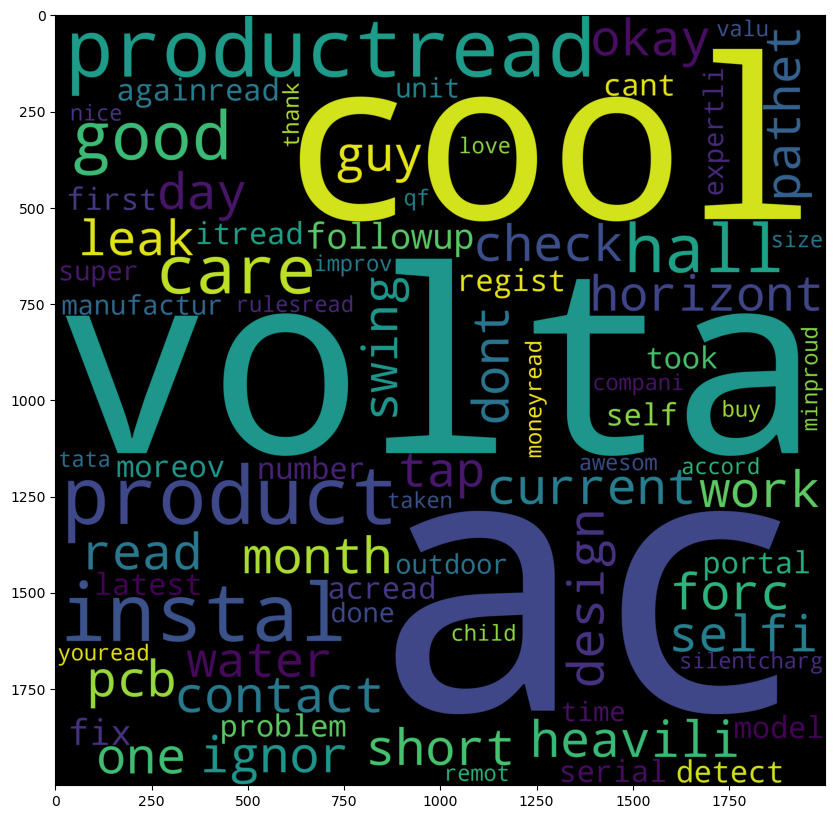

In [28]:
wordcloud_test=' '.join(model['reviews'])
q_wordcloud=WordCloud(background_color='black',width=2000,height=2000).generate(wordcloud_test)
plt.figure(figsize=(16,10))
plt.imshow(q_wordcloud)
plt.show()

In [29]:
freq=pd.Series(' '.join(model['reviews']).split()).value_counts()[0:20]
freq

ac             8
volta          4
product        3
productread    3
cool           3
instal         3
good           2
hall           2
care           2
expertli       1
silentcharg    1
also           1
unit           1
outdoor        1
super          1
manufactur     1
done           1
time           1
model          1
latest         1
dtype: int64

### Polarity for sentiment Analysis

In [30]:
from textblob import TextBlob
model['polarity']=model.reviews.apply(lambda x: TextBlob(x).sentiment[0])

In [31]:
model

,reviews,polarity
0,ac good one month ac pcb short current contact...,0.262500
1,good productread,0.700000
2,ac design okay horizont swing instal guy pathe...,0.500000
3,first acread,0.250000
4,instal took k moreov cant regist product volta...,0.000000
5,product latest model manufactur instal time do...,0.394444
6,valu moneyread,0.000000
7,nice product remot could improv thank youread,0.600000
8,love productread,0.500000
9,awesom cool hall size qf ac child hall minprou...,0.350000


In [32]:
model.insert(column='emotion',loc=2,value='')

In [33]:
model

,reviews,polarity,emotion
0,ac good one month ac pcb short current contact...,0.262500,
1,good productread,0.700000,
2,ac design okay horizont swing instal guy pathe...,0.500000,
3,first acread,0.250000,
4,instal took k moreov cant regist product volta...,0.000000,
5,product latest model manufactur instal time do...,0.394444,
6,valu moneyread,0.000000,
7,nice product remot could improv thank youread,0.600000,
8,love productread,0.500000,
9,awesom cool hall size qf ac child hall minprou...,0.350000,


In [34]:
def senti(text):
    if text<0.5:
        return 'negative'
    elif text==0.5:
        return 'neutral'
    else:
        return 'positive'
model['emotion']=model['polarity'].apply(senti)

In [35]:
model

,reviews,polarity,emotion
0,ac good one month ac pcb short current contact...,0.262500,negative
1,good productread,0.700000,positive
2,ac design okay horizont swing instal guy pathe...,0.500000,neutral
3,first acread,0.250000,negative
4,instal took k moreov cant regist product volta...,0.000000,negative
5,product latest model manufactur instal time do...,0.394444,negative
6,valu moneyread,0.000000,negative
7,nice product remot could improv thank youread,0.600000,positive
8,love productread,0.500000,neutral
9,awesom cool hall size qf ac child hall minprou...,0.350000,negative


### emotion count plot

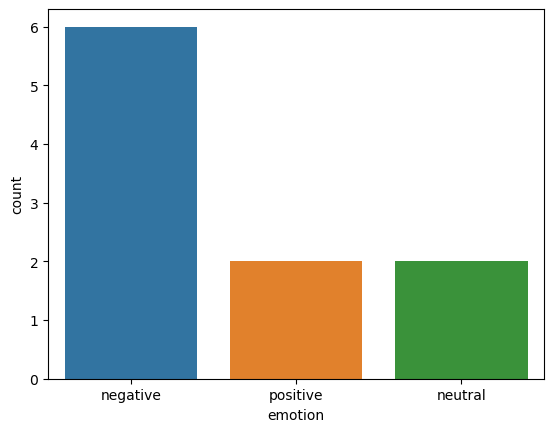

In [37]:
sns.countplot(x=model['emotion'])
plt.show()

In [41]:
model.emotion.value_counts(normalize=True).mul(100)

negative    60.0
positive    20.0
neutral     20.0
Name: emotion, dtype: float64

#### 60% of review for AC are negative while positive and neutral reviews are equal in proportion